# Airbnb map


## Problema de Negócio
O propósito deste projeto é criar um mapa interativo com base nos anúncios do Airbnb. O mapa irá utilizar as informações de localização fornecidas nos anúncios para apresentar de forma visual e interativa a distribuição geográfica dos imóveis na região.



In [ ]:
!pip install shapely

In [ ]:
!pip install descartes

In [ ]:
#Ler as bibliotecas necessárias
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, LineString, Polygon
import openpyxl
import pandas as pd

## Lendo o Conjunto de Dados

O primeiro conjunto de  dados se trata de um dataset retirado do Kagle na qual tem informações sobre airbnb disponíveis para aluguel, além de informações sobre os mesmos.

Para acessar a fonte dos dados clique aqui: [Dados Airbnb](https://www.kaggle.com/datasets/pedrostevanin/modelo-de-previsao-airbnb-rio)


In [ ]:
#Lendo os dados
data_airbnb = pd.read_csv('/content/dados.csv')

In [ ]:
#Visualizar as 5 primeiras linhas
data_airbnb.head()

,Unnamed: 0,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,extra_people,...,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Outros,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,price
0,1,1,2.0,-22.965919,-43.178962,5,1.0,2.0,2.0,51.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,270.0
1,3,0,3.0,-22.977117,-43.190454,3,1.0,1.0,2.0,45.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,161.0
2,4,1,1.0,-22.983024,-43.214270,3,1.0,1.0,2.0,68.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,222.0
3,5,1,1.0,-22.988165,-43.193588,3,1.5,1.0,2.0,86.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,308.0
4,6,1,1.0,-22.981269,-43.190457,2,1.0,1.0,2.0,80.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,219.0


In [ ]:
#Verificando a dimensão dos dados
data_airbnb.shape

(43075, 36)

In [ ]:
# Visualizando as colunas
data_airbnb.columns

Index(['Unnamed: 0', 'host_is_superhost', 'host_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'extra_people', 'minimum_nights', 'instant_bookable', 'ano', 'mes',
       'n_amenities', 'property_type_Apartment',
       'property_type_Bed and breakfast', 'property_type_Condominium',
       'property_type_Guest suite', 'property_type_Guesthouse',
       'property_type_Hostel', 'property_type_House', 'property_type_Loft',
       'property_type_Outros', 'property_type_Serviced apartment',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'bed_type_Outros',
       'bed_type_Real Bed', 'cancellation_policy_flexible',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period', 'price'],
      dtype='object')

## Descriçõa geral dos dados

Este conjunto de dados provém de anúncios do Airbnb e oferece uma visão abrangente das características e informações relevantes associadas a esses anúncios. Cada entrada no conjunto de dados representa um anúncio individual e inclui uma variedade de informações essenciais. A seguir, descrevo detalhadamente o significado de cada coluna:

***host_is_superhost:*** Indicação se o anfitrião é um superhost.

***host_listings_count:*** Contagem do número de anúncios que o host possui.

***latitude, longitude:*** Coordenadas geográficas do local do anúncio.

***accommodates:*** Número máximo de hóspedes que o anúncio pode acomodar.

***bathrooms, bedrooms, beds:*** Número de banheiros, quartos e camas no local.

***extra_people:*** Valor adicional cobrado por pessoa extra.

***minimum_nights:*** Número mínimo de noites para reserva.

***instant_bookable:*** Indicação se a reserva é instantânea.
ano, mes: Ano e mês da listagem.

***n_amenities:*** Número de comodidades oferecidas.

***property_type_...:*** Colunas binárias indicando o tipo de propriedade.

***room_type_...:*** Colunas binárias indicando o tipo de quarto.

***bed_type_...:*** Colunas binárias indicando o tipo de cama.

***cancellation_policy_...:*** Colunas binárias indicando a política de cancelamento.

***price:*** Preço do aluguel do local.

In [ ]:
#Mostrar apenas os dados de Latitude e Longitude
df = data_airbnb[['latitude', 'longitude']]
#Iremos verificar se existe NA (Not a Numbers) nos dados
df.isna().sum()

latitude     0
longitude    0
dtype: int64

Como não ha registros que não possa ser localizados com not a numbers, não precisamos nos preucupar em retirar esses registros.

## Lendo os Dados Geospaciais

O segundo dataset com os dados Geospaciais utilizados para a construção do mapa, foram retirados do IBGE, na qual tem a demarcação dos municipios do Rio de Janeiro. Esse dataset é importante, para que consigamos desenvolver um mapa mais robusto e detalhado, separando cada municipio presente na região.

In [ ]:
data = gpd.read_file('/content/RJ_Municipios_2022.shp')

In [ ]:
data

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3300100,Angra dos Reis,RJ,813.420,"MULTIPOLYGON (((-44.51649 -23.03589, -44.51633..."
1,3300159,Aperibé,RJ,94.542,"POLYGON ((-42.11437 -21.61204, -42.11394 -21.6..."
2,3300209,Araruama,RJ,638.276,"POLYGON ((-42.28399 -22.93928, -42.28444 -22.9..."
3,3300225,Areal,RJ,110.724,"POLYGON ((-43.09004 -22.23844, -43.09135 -22.2..."
4,3300233,Armação dos Búzios,RJ,70.977,"MULTIPOLYGON (((-41.91872 -22.77162, -41.91854..."
...,...,...,...,...,...
87,3306008,Três Rios,RJ,322.843,"POLYGON ((-43.23685 -22.13806, -43.23831 -22.1..."
88,3306107,Valença,RJ,1300.767,"POLYGON ((-43.72940 -22.09312, -43.72927 -22.0..."
89,3306156,Varre-Sai,RJ,201.938,"POLYGON ((-41.89492 -20.97015, -41.89490 -20.9..."
90,3306206,Vassouras,RJ,536.073,"POLYGON ((-43.66409 -22.45808, -43.67771 -22.4..."


In [ ]:
type(data)

geopandas.geodataframe.GeoDataFrame

Podemos ver que o tipo da variável é um `GeoDataFrame`. O objeto GeoDataFrame herda as funcionalidades do `pandas.DataFrame` adicionando operações sobre dados espaciais, usando abordagens semelhantes as estruturas de dados do Pandas (por isso o nome Geopandas). O `GeoDataFrame` possui algumas características especiais e funções internas que facilitam análises de estruturas geométricas.

In [ ]:
data.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3300100,Angra dos Reis,RJ,813.420,"MULTIPOLYGON (((-44.51649 -23.03589, -44.51633..."
1,3300159,Aperibé,RJ,94.542,"POLYGON ((-42.11437 -21.61204, -42.11394 -21.6..."
2,3300209,Araruama,RJ,638.276,"POLYGON ((-42.28399 -22.93928, -42.28444 -22.9..."
3,3300225,Areal,RJ,110.724,"POLYGON ((-43.09004 -22.23844, -43.09135 -22.2..."
4,3300233,Armação dos Búzios,RJ,70.977,"MULTIPOLYGON (((-41.91872 -22.77162, -41.91854..."


## 3) Visualização dos Dados

Quando se trata de dados Geospaciais, o ideal é realizar a exploração dos dados com base em um mapa. Então para isso, criaremos um mapa e nossas análises irão partir dele.

<Axes: >

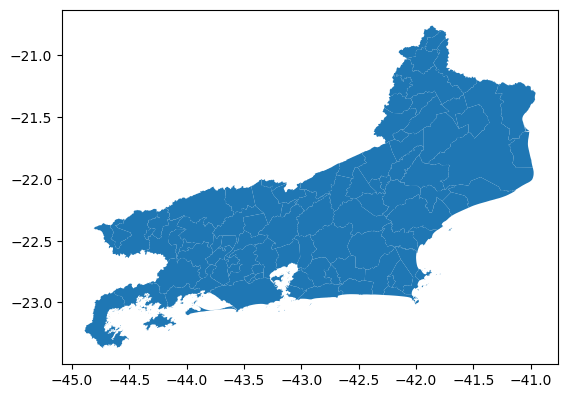

In [ ]:
data.plot()

Melhorando a visualização com matplotlib

<Axes: >

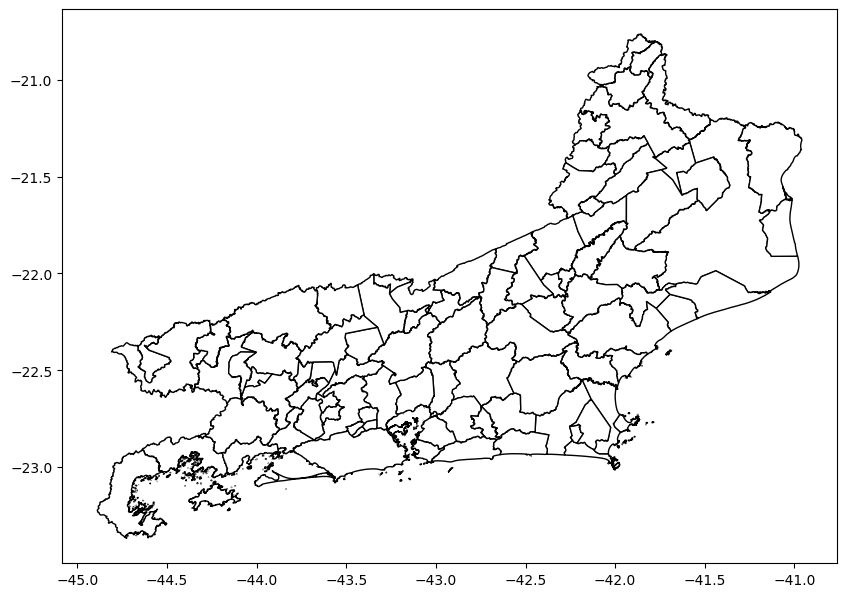

In [ ]:
data.plot(figsize = (10, 10), facecolor = 'white', edgecolor = 'black')

## Conclusão

Neste primeiro momento, optamos por explorar os dados dos quais utilizaremos para construir nosso mapa interativo. Realizamos visualização dos dados Geospaciais e uma análise exploratória para verificar a qualidade dos dados da coluna de ***latitude*** e ***longitude*** dos airbnb, para não ter o risco de ficar registros sem localização. Nos próximos passos, criaremos um Geodataframe, e começaremos o desenvolvimento do nosso mapa.